In [8]:
import numpy as np
from tensorflow.keras import Sequential
from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Flatten, Dense, Input
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

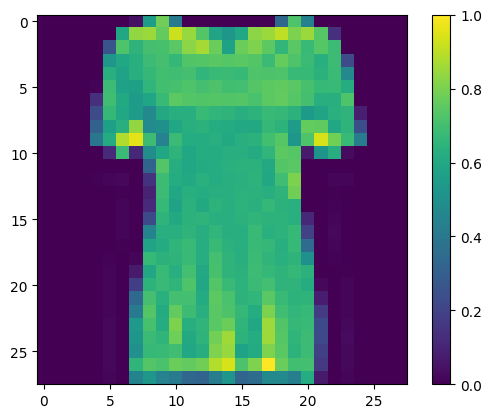

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.show()

In [10]:
model = Sequential([Input(shape=(28, 28)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0424
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0351
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0346
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0372
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0390
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0381
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0433
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0360
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0318
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0351
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0339
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
# model.save('ImagRec1.keras')
# from keras.models import load_model
# load_model('ImagRec2.keras')

In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAccuracy: ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8859 - loss: 0.9731

Accuracy:  0.8859000205993652


In [61]:
predictions = model.predict(test_images)
n = 666
im1 = np.argmax(predictions[n])
lab1 = test_labels[n]
print(im1, lab1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3 3


In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f} %({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predict_label = np.argmax(predictions_array)
    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')

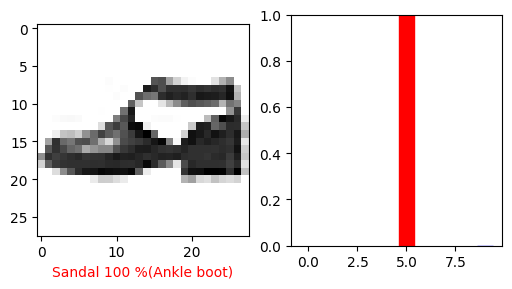

In [66]:
i = 23
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

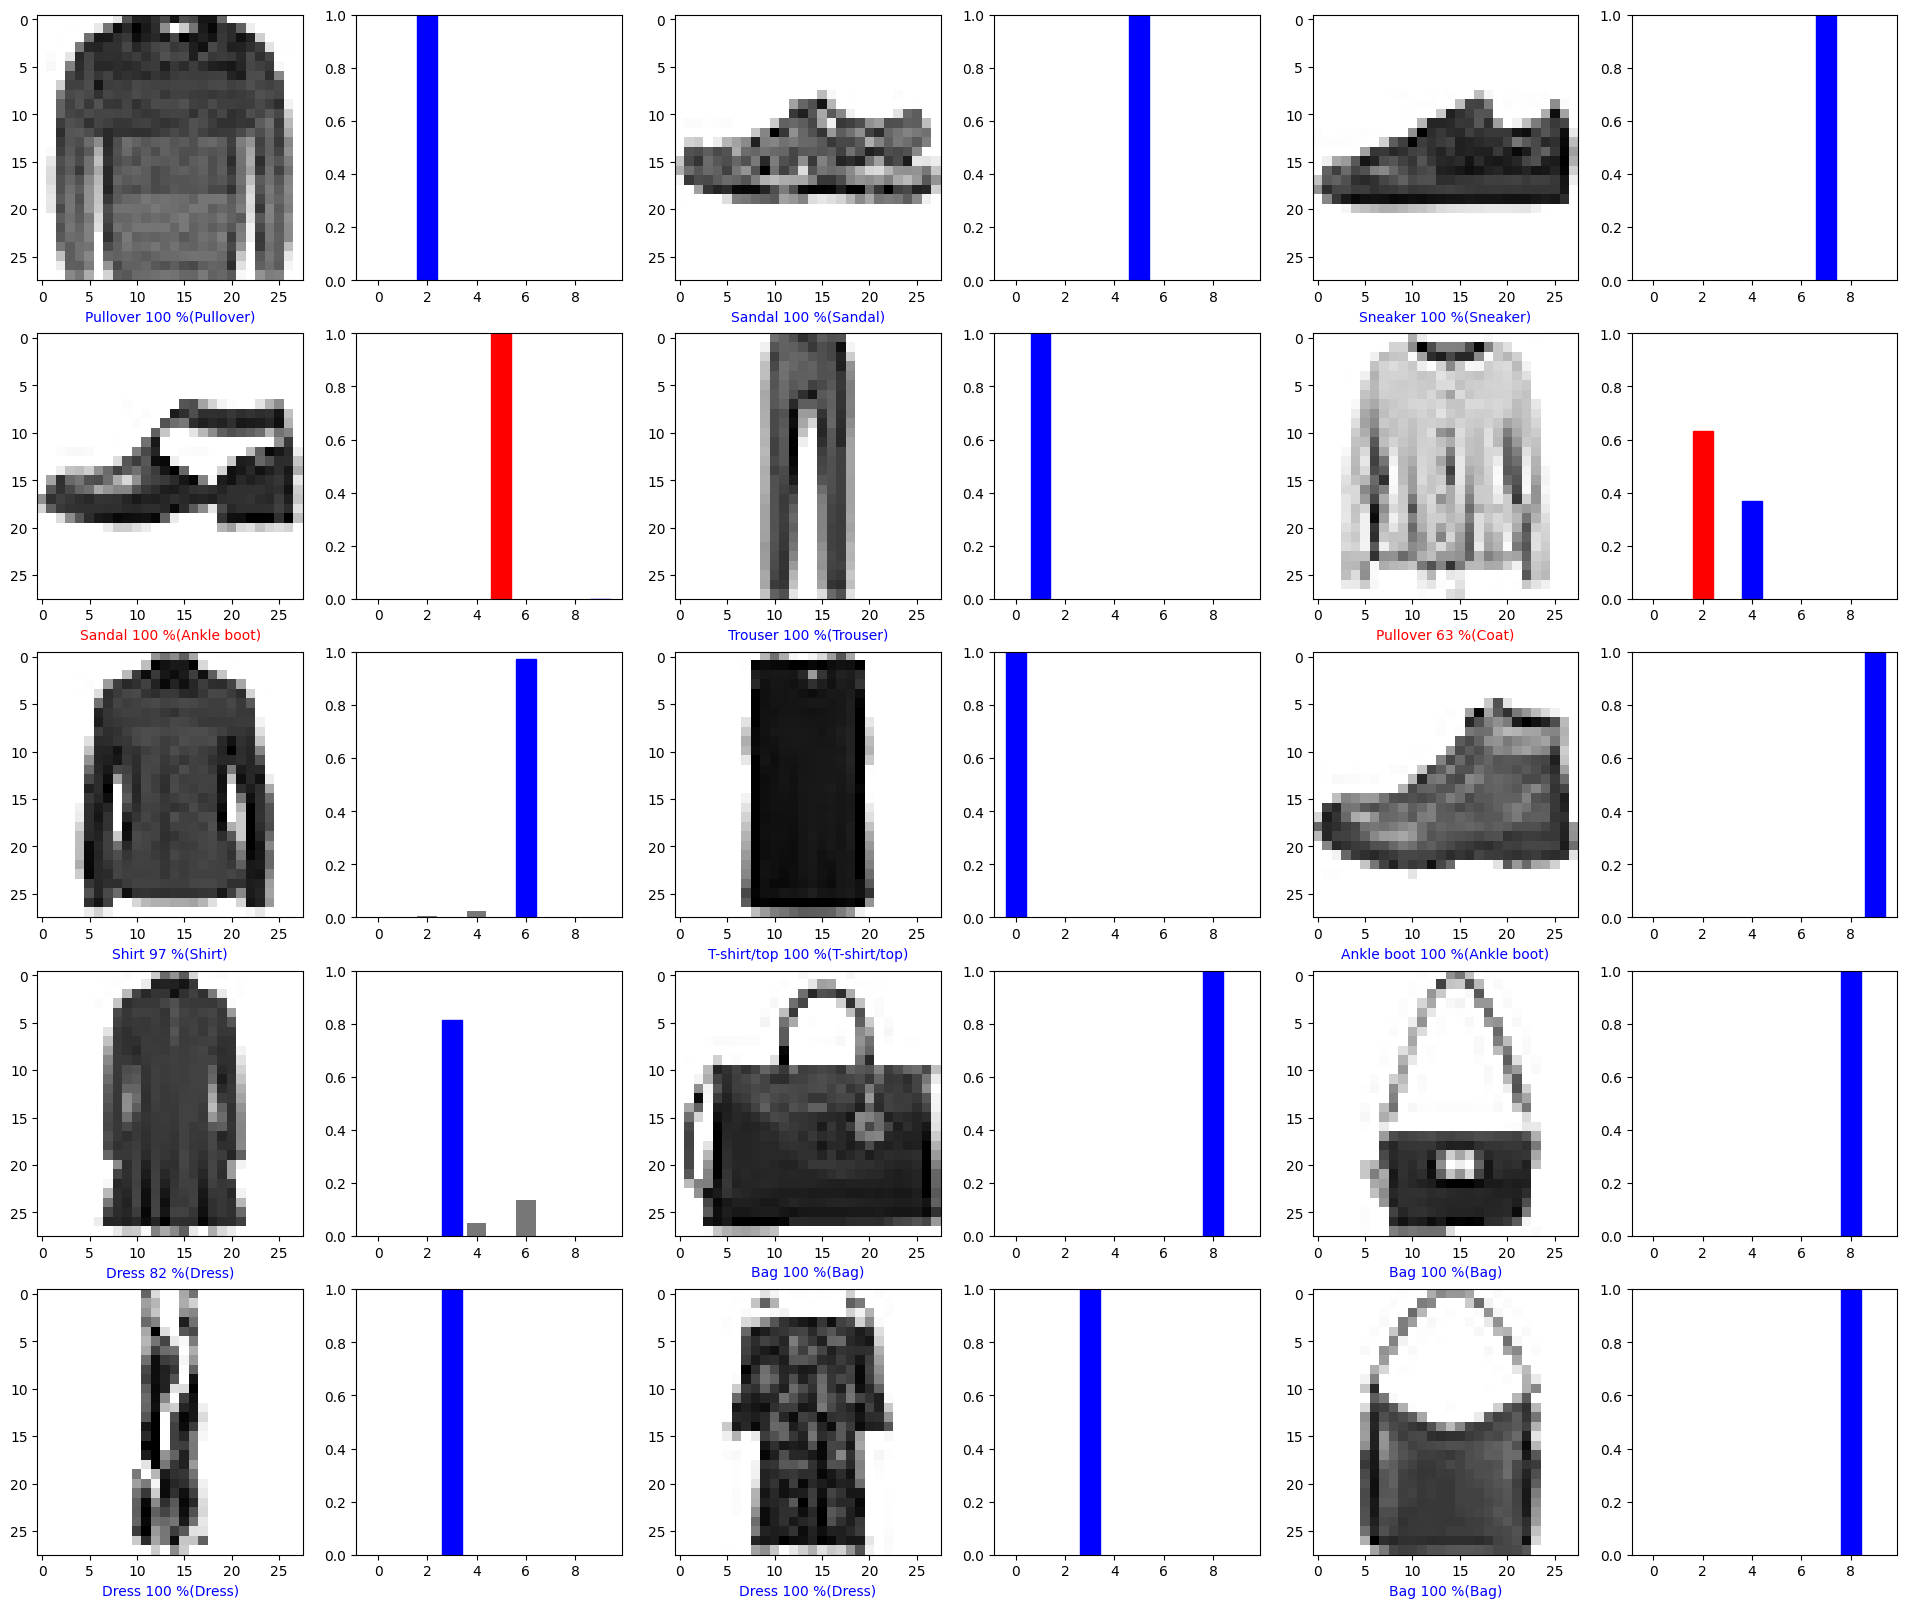

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*4*num_cols, 4*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+20, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+20, predictions, test_labels)
plt.show()

In [57]:
weights = model.get_weights()[1]
print(weights)

[-0.39885518  0.874987    0.40829247  0.3319214   1.1824181   0.6249148
 -0.5083469  -0.5597263   1.528781    0.71678936  1.1727135   0.4049772
  0.8223142   0.34904793  0.70746297 -0.0687919   0.3158899  -0.8911084
  0.3256473   0.3658751   1.8937588   1.502946    0.95918226 -0.01217796
  1.4971706   0.42929903  0.53653985  0.350671   -0.01398715  0.41152176
  0.97125596  1.2412102  -0.18609877  0.8458637   0.06353799  1.6148816
  0.531491    0.5081998   0.3190296   0.30298892  0.77755857 -1.2179557
 -0.31168258  1.1448108   0.09799744  0.8371198   0.5318353   0.24911658
  0.91581243  0.49518627  0.6991994  -1.482121    0.2644282   0.16162662
 -1.5178683   0.62540495  1.2159587   0.5117836  -0.36699954  0.46256185
  1.3119308   1.0255069   0.6035261   1.329842    0.90551174  1.0552988
 -0.24371968 -0.06426165  0.24409048 -0.15842092 -0.02288753  1.6601254
  0.58729035  0.17369124  0.176015   -0.7555783  -0.506078   -0.6086655
  1.5100238   0.9209821   0.14480096 -0.6576511  -0.1846681